In [1]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import *
from datetime import time, tzinfo, timedelta, datetime
%matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
client = MongoClient('52.79.239.183', 27017)
print("DB connection complete!!")

DB connection complete!!


In [3]:
def Get_each_Coin_DF(coinName):
    DB_Coin = client[coinName]
    Collection = DB_Coin['BTC/USD_30MIN']
    DB_schema = []
    for collect in Collection.find():
        temp_record = {}
        temp_record[coinName] = collect['price_close']
        temp_record['Date'] = collect['time_period_end']
        temp_record['label'] = coinName
        temp_record[coinName+'vol'] = collect['volume_traded']
        DB_schema.append(temp_record)
        del temp_record
    
    DF = pd.DataFrame(DB_schema)
    DF['Date'] = DF['Date'].apply(pd.to_datetime, errors='coerce')
    DF.index = DF['Date']
    DF = DF.sort_values(by='Date')
    DF = DF[[coinName, coinName+'vol']] # remove Date Column
    DF[coinName].plot()
    return DF
    
    

/home/seonwheejin/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: FutureWarning: 'Date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


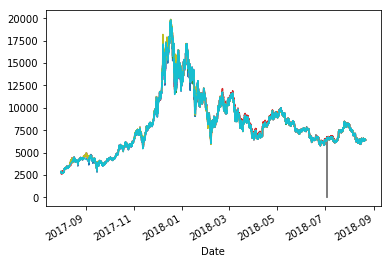

In [4]:
BinanceDF = Get_each_Coin_DF("BINANCE")
HuobiDF = Get_each_Coin_DF("HUOBI")
OkexDF = Get_each_Coin_DF("OKEX")
HitbtcDF = Get_each_Coin_DF("HITBTC")
BitfinexDF = Get_each_Coin_DF("BITFINEX")
#######################
BitmexDF = Get_each_Coin_DF("BITMEX")
BitstampDF = Get_each_Coin_DF("BITSTAMP")
BittrexDF = Get_each_Coin_DF("BITTREX")
CoinbaseDF = Get_each_Coin_DF("COINBASE")
PoloniexDF = Get_each_Coin_DF("POLONIEX")

In [5]:
BinanceDF.head()

,BINANCE,BINANCEvol
Date,,
2017-08-17 04:30:00,4261.45,11.308926
2017-08-17 05:00:00,4308.83,35.872083
2017-08-17 05:30:00,4320.00,21.048648
2017-08-17 06:00:00,4315.32,2.186268
2017-08-17 06:30:00,4311.02,3.566277


### Vertically merging DataFrame

In [ ]:
NewDF = pd.concat([BinanceDF, HuobiDF, OkexDF, HitbtcDF, BitfinexDF])
NewDF.head()

In [ ]:
NewDF.boxplot()

### Horizontally merging DataFrame

In [5]:
JoinedDF = pd.merge(BinanceDF, HuobiDF, how='inner', left_index=True, right_index=True)
for df in [OkexDF, HitbtcDF, BitfinexDF, BitmexDF, BitstampDF, CoinbaseDF, PoloniexDF]:
    JoinedDF = pd.merge(JoinedDF, df, how='inner', left_index=True, right_index=True)

JoinedDF.head()

,BINANCE,BINANCEvol,HUOBI,HUOBIvol,OKEX,OKEXvol,HITBTC,HITBTCvol,BITFINEX,BITFINEXvol,BITMEX,BITMEXvol,BITSTAMP,BITSTAMPvol,COINBASE,COINBASEvol,POLONIEX,POLONIEXvol
Date,,,,,,,,,,,,,,,,,,
2018-04-13 13:30:00,8197.00,1335.090625,8186.36,520.490919,8192.6635,60.820598,8454.26,154.68,8187.4,1227.767744,8173.5,10405567.0,8193.67,521.220130,8192.99,517.845969,8190.674329,334.581684
2018-04-13 14:00:00,8096.00,2337.846182,8097.95,817.057652,8089.7385,134.670198,8340.37,372.65,8098.7,3113.904313,8096.0,36914774.0,8104.85,1745.316795,8098.92,1060.620530,8089.174841,201.336011
2018-04-13 14:30:00,8058.98,1422.982207,8057.29,556.942785,8079.9800,107.564683,8282.76,165.81,8064.7,1823.100841,8065.0,36812616.0,8086.33,1304.624593,8069.40,616.933437,8063.883275,83.742039
2018-04-13 15:00:00,8099.00,1125.215762,8100.01,413.334528,8101.1082,143.221855,8291.79,52.01,8100.0,1276.634789,8099.5,29483343.0,8120.00,698.517963,8112.01,424.557285,8108.552578,61.393812
2018-04-13 15:30:00,8100.00,890.514912,8099.99,354.887813,8090.2714,122.864086,8285.06,24.68,8093.1,593.065050,8091.5,25107011.0,8114.55,704.642739,8104.79,231.891295,8098.000000,41.066676


In [7]:
Top5 = ['BINANCE', 'HUOBI', 'OKEX', 'HITBTC', 'BITFINEX']
VolDF = JoinedDF[['BINANCEvol', 'HUOBIvol', 'OKEXvol', 'HITBTCvol', 'BITFINEXvol']]
JoinedDF = JoinedDF[Top5]

In [6]:
Top10 = ['BINANCE', 'HUOBI', 'OKEX', 'HITBTC', 'BITFINEX', "BITMEX", "BITSTAMP", "COINBASE", 'POLONIEX']
VolDF = JoinedDF[['BINANCEvol', 'HUOBIvol', 'OKEXvol', 'HITBTCvol', 'BITFINEXvol', "BITMEXvol", "BITSTAMPvol", 'COINBASEvol', 'POLONIEXvol']]
JoinedDF = JoinedDF[Top10]

In [7]:
def get_weights(DF_name, DF_key):
    DF_name['wt'+DF_key] = DF_name[DF_key] / DF_name.sum(axis=1)
    
get_weights(VolDF, 'BINANCEvol')
get_weights(VolDF, 'HUOBIvol')
get_weights(VolDF, 'OKEXvol')
get_weights(VolDF, 'HITBTCvol')
get_weights(VolDF, 'BITFINEXvol')
##################################
get_weights(VolDF, "BITMEXvol")
get_weights(VolDF, "BITSTAMPvol")
#get_weights(VolDF, "BITTREXvol")
get_weights(VolDF, 'COINBASEvol')
get_weights(VolDF, 'POLONIEXvol')

JoinedDF['Weighted_Avg'] = np.zeros(len(JoinedDF))

summation = 0.0
for key_name in Top10:
    multiply = JoinedDF[key_name] * VolDF['wt'+key_name+'vol']
    JoinedDF['Weighted_Avg'] = JoinedDF['Weighted_Avg'] + multiply
    del multiply
    
print(JoinedDF.head())


                     BINANCE    HUOBI       OKEX   HITBTC  BITFINEX  BITMEX  \
Date                                                                          
2018-04-13 13:30:00  8197.00  8186.36  8192.6635  8454.26    8187.4  8173.5   
2018-04-13 14:00:00  8096.00  8097.95  8089.7385  8340.37    8098.7  8096.0   
2018-04-13 14:30:00  8058.98  8057.29  8079.9800  8282.76    8064.7  8065.0   
2018-04-13 15:00:00  8099.00  8100.01  8101.1082  8291.79    8100.0  8099.5   
2018-04-13 15:30:00  8100.00  8099.99  8090.2714  8285.06    8093.1  8091.5   

                     BITSTAMP  COINBASE     POLONIEX  Weighted_Avg  
Date                                                                
2018-04-13 13:30:00   8193.67   8192.99  8190.674329   8173.512111  
2018-04-13 14:00:00   8104.85   8098.92  8089.174841   8096.003179  
2018-04-13 14:30:00   8086.33   8069.40  8063.883275   8065.001487  
2018-04-13 15:00:00   8120.00   8112.01  8108.552578   8099.501041  
2018-04-13 15:30:00   8114.55   

### Get CoinMarketCap Data

In [8]:
#CMC = pd.read_csv("./CoinMarketCap.csv", sep=",", header=["Date", "CoinMarketCap"])
CMC = pd.read_csv("./CoinMarketCap.csv")
CMC['Date'] = CMC['Date'].apply(pd.to_datetime, errors='coerce')
CMC.index = CMC['Date']
CMC = CMC.sort_values(by='Date')
CMC = CMC[["CoinMarketCap"]] # remove Date Column
CMC.head()

/home/seonwheejin/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: 'Date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """


,CoinMarketCap
Date,
2017-08-19,4193.70
2017-08-20,4087.66
2017-08-21,4001.74
2017-08-22,4100.52
2017-08-23,4151.52


In [9]:
Time_main = list(JoinedDF.index)
Time_CMC = list(CMC.index)
Weight_mean = JoinedDF[['Weighted_Avg']]
#JoinedDF = JoinedDF[Top5]
JoinedDF = JoinedDF[Top10]
def intersection(list1, list2):
    return list(set(list1) & set(list2))

Data_index = intersection(Time_main, Time_CMC)

Data_to_plot = []
Data_xvalue = []
Data_CMC = []
Data_weight_avg = []
for ii in Data_index:
    idx = ii.strftime('%Y-%m-%d %H:%M:%S')    
    Data_to_plot.append(tuple(JoinedDF.loc[idx]))
    Data_CMC.append(tuple(CMC.loc[idx]))
    Data_weight_avg.append(tuple(Weight_mean.loc[idx]))
    Data_xvalue.append(idx) 

# 2018-01-26 ~ 2018-08-17

In [10]:
vsCMC = pd.merge(CMC, JoinedDF, how='inner', left_index=True, right_index=True)
vsCMC.head()

,CoinMarketCap,BINANCE,HUOBI,OKEX,HITBTC,BITFINEX,BITMEX,BITSTAMP,COINBASE,POLONIEX
Date,,,,,,,,,,
2018-04-14,7986.24,7877.41,7873.74,7869.5200,8112.23,7886.9,7887.5,7896.92,7893.19,7875.000000
2018-04-15,8329.11,7999.01,8000.00,7974.4533,8201.55,8003.0,7999.0,8000.41,8003.11,7996.000000
2018-04-18,8163.42,7885.02,7891.44,7889.9000,8136.12,7888.9,7889.5,7890.87,7892.10,7891.100000
2018-04-19,8294.31,8173.00,8168.31,8165.1704,8343.88,8171.0,8177.0,8172.84,8152.05,8164.190618
2018-04-20,8845.83,8278.00,8284.99,8274.4317,8492.11,8273.0,8266.0,8271.31,8274.00,8286.999998


{'boxes': [<matplotlib.lines.Line2D at 0x7feb5fae6cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7feb5fae02e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feb5fadc3c8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feb5fae0f60>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7feb5fae6e10>,
  <matplotlib.lines.Line2D at 0x7feb5f754b70>]}

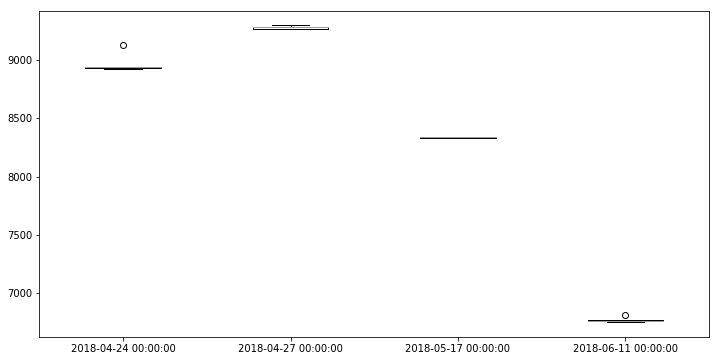

In [156]:
fig = plt.figure(1, figsize=(12, 6))  # Create a figure instance
ax = fig.add_subplot(111)  # Create an axes instance
#ax.scatter(x = Data_xvalue[:4], y =Data_CMC[:4], s=12)
ax.boxplot(Data_to_plot[:4], labels=Data_xvalue[:4])

/home/seonwheejin/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

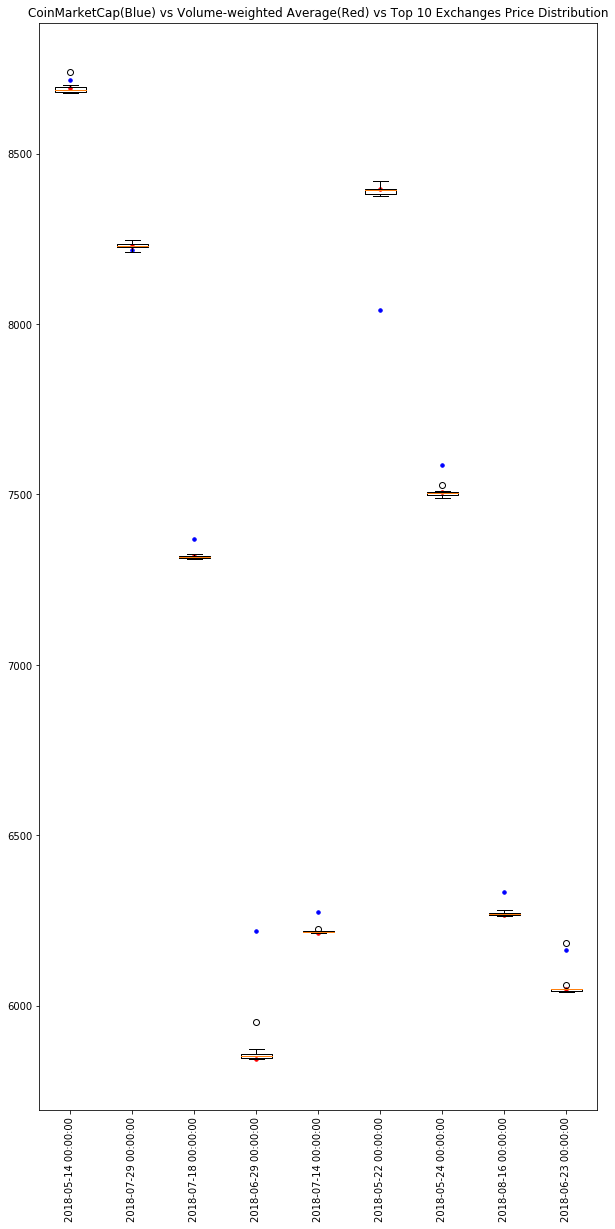

In [12]:
fig = plt.figure(1, figsize=(10, 20))  # Create a figure instance
plt.title("CoinMarketCap(Blue) vs Volume-weighted Average(Red) vs Top 10 Exchanges Price Distribution")
ax = fig.add_subplot(111)  # Create an axes instance
ax.scatter(x = Data_xvalue[:10], y =Data_CMC[:10], c="blue", s=12)
ax.scatter(x = Data_xvalue[:10], y =Data_weight_avg[:10], c="red", s=12)
ax.boxplot(Data_to_plot[1:10], labels=Data_xvalue[1:10])
plt.xticks(rotation=90)

/home/seonwheejin/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text xticklabel objects>)

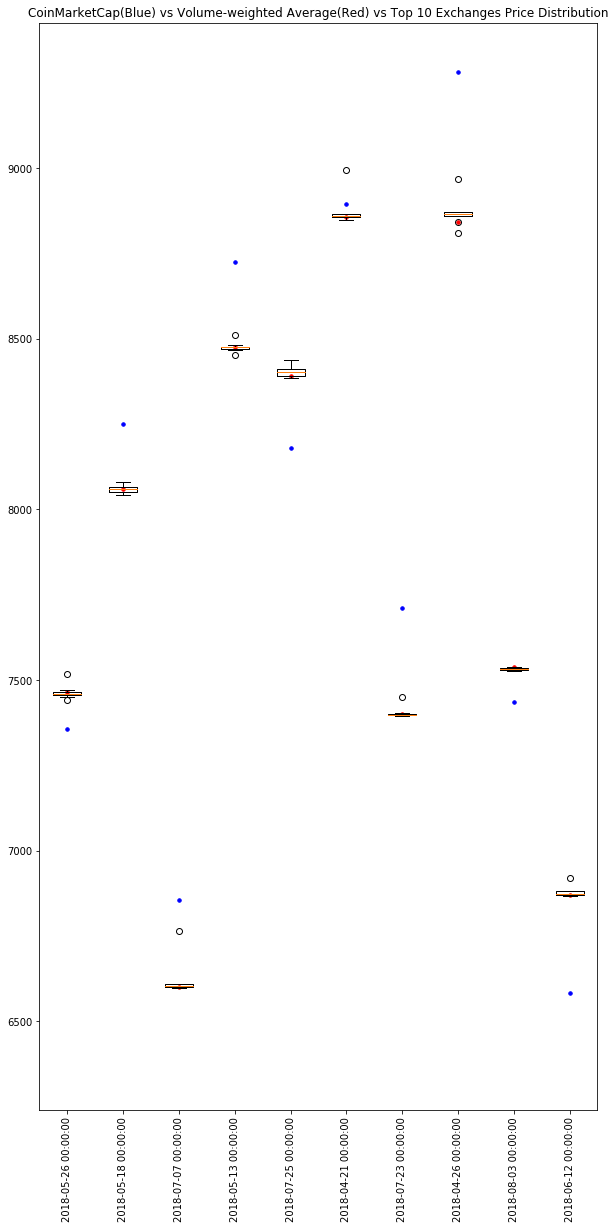

In [13]:
fig = plt.figure(1, figsize=(10, 20))  # Create a figure instance
plt.title("CoinMarketCap(Blue) vs Volume-weighted Average(Red) vs Top 10 Exchanges Price Distribution")
ax = fig.add_subplot(111)  # Create an axes instance
ax.scatter(x = Data_xvalue[19:30], y =Data_CMC[19:30], c="blue", s=12)
ax.scatter(x = Data_xvalue[20:30], y =Data_weight_avg[20:30], c="red", s=12)
ax.boxplot(Data_to_plot[20:30], labels=Data_xvalue[20:30])
plt.xticks(rotation=90)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


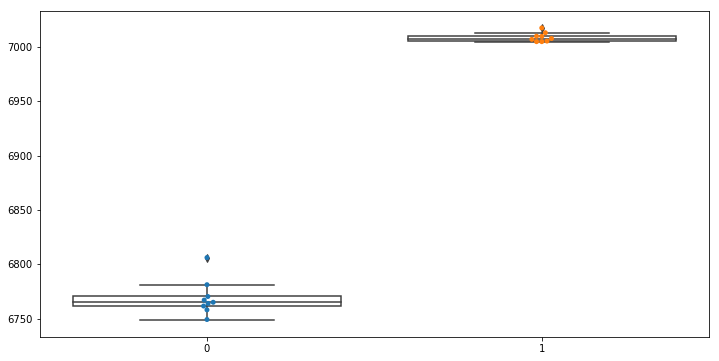

In [14]:
from pandas import TimeGrouper
import seaborn
fig = plt.figure(1, figsize=(12, 6))  # Create a figure instance
#ax = fig.add_subplot(111)  # Create an axes instance
ax = seaborn.boxplot(data=Data_to_plot[100:102], boxprops={'facecolor':'None'})
#ax = seaborn.stripplot(data=Data_to_plot[100:102])
ax = seaborn.swarmplot(data=Data_to_plot[100:102])

In [16]:
print(JoinedDF.index[:400])

DatetimeIndex(['2018-06-05 21:30:00', '2018-06-06 07:30:00',
               '2018-06-06 08:30:00', '2018-06-06 11:30:00',
               '2018-06-06 13:00:00', '2018-06-06 14:30:00',
               '2018-06-06 15:00:00', '2018-06-06 16:30:00',
               '2018-06-06 17:00:00', '2018-06-06 18:30:00',
               ...
               '2018-06-25 17:00:00', '2018-06-25 17:30:00',
               '2018-06-25 18:00:00', '2018-06-25 18:30:00',
               '2018-06-25 20:00:00', '2018-06-25 21:00:00',
               '2018-06-25 22:00:00', '2018-06-25 22:30:00',
               '2018-06-25 23:00:00', '2018-06-25 23:30:00'],
              dtype='datetime64[ns]', name='Date', length=400, freq=None)


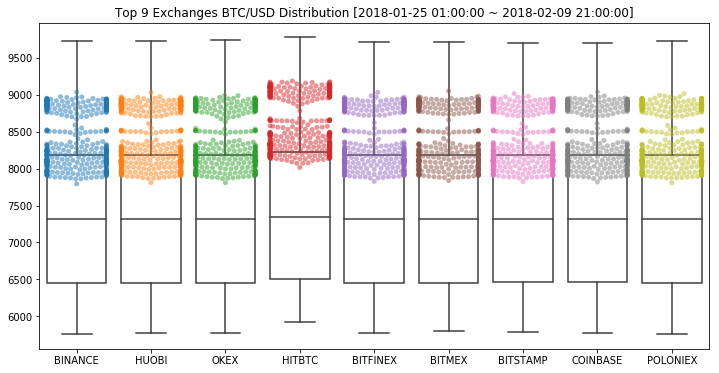

In [18]:
fig = plt.figure(1, figsize=(12, 6))  # Create a figure instance
plt.title("Top 9 Exchanges BTC/USD Distribution [2018-01-25 01:00:00 ~ 2018-02-09 21:00:00]")
ax = seaborn.boxplot(data=JoinedDF, boxprops={'facecolor':'None'})
ax = seaborn.swarmplot(data=JoinedDF[:400], alpha=.5 )

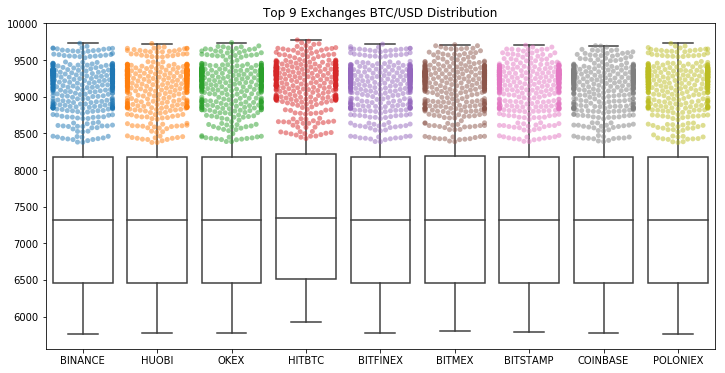

In [19]:
fig = plt.figure(1, figsize=(12, 6))  # Create a figure instance
plt.title("Top 9 Exchanges BTC/USD Distribution")
ax = seaborn.boxplot(data=JoinedDF, boxprops={'facecolor':'None'})
ax = seaborn.swarmplot(data=JoinedDF[401:800], alpha=.5)

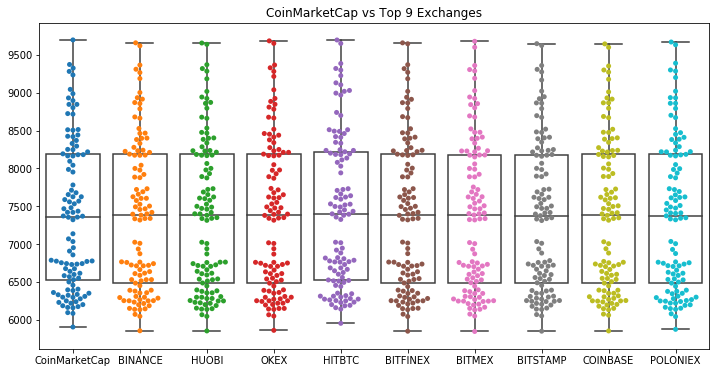

In [20]:
fig = plt.figure(1, figsize=(12, 6))  # Create a figure instance
plt.title("CoinMarketCap vs Top 9 Exchanges")
ax = seaborn.boxplot(data=vsCMC, boxprops={'facecolor':'None'})
ax = seaborn.swarmplot(data=vsCMC)